
#**Two-Pot Retirement System: Predicting Employee Withdrawals and Forecasting Locked Pot Growth**

# Student Details
- **Name:** Msane Z.N  
- **Student Number:** 2241488  


# Introduction
In this project, we aim to address the real-world challenge of the Two-Pot Retirement System. The Accessible Pot allows partial withdrawals, while the Locked Pot is preserved for long-term retirement savings. We will use machine learning to:  
1. Predict which employees are at high or low risk of withdrawals (classification task).  
2. Forecast long-term growth of the Locked Pot using mutual fund time-series data (forecasting task).  

By combining employee-level financial data with investment growth data, we can provide insights to improve retirement policy and financial planning.


# Data Source and Dataset Overview

**Datasets Used:**  
- [Employee Financial Data (Kaggle)](https://www.kaggle.com/datasets/tanishchavaan/employee-financial-data?utm_source=chatgpt.com)  
- [Mutual Funds Data (Kaggle)](https://www.kaggle.com/datasets/dhavalrupapara/mutual-funds-market-dataset?utm_source=chatgpt.com)  

**Tables in the Dataset:**  
1. **employee_financial_data.csv**  
   - Contains employee ID, department, monthly salary, taxes, contributions, expenses, savings, investments, profit, and class (High/Low withdrawal risk).  

2. **mutual_funds_data.csv**  
   - Contains scheme code, scheme name, fund house, scheme type, scheme category, net asset value (NAV), and date (time series of investment performance).  


# Machine Learning Life Cycle

**Problem Definition**  
We will focus on the challenge of predicting withdrawal behavior under the Two-Pot Retirement System. The goal is to classify employees into high or low withdrawal risk and forecast long-term growth of locked retirement funds.

**Data Collection**  
The datasets used are Employee Financial Data and Mutual Funds Data from Kaggle. These datasets reflect both employee financial behavior and investment growth patterns.

**Data Preparation**  
We will upload the datasets, extract their contents, and load them into Pandas DataFrames for analysis and preprocessing.

**Data Understanding**  
We will explore the structure and contents of each dataset, examine their variables, and identify features relevant for classification and forecasting.

**Data Cleaning & Preprocessing**  
We will handle missing values, remove duplicates, encode categorical variables, normalize numerical features, and parse time series dates for investment data.

**Exploratory Data Analysis (EDA)**  
We will visualize patterns such as employee salaries, savings, expenditure distributions, and historical NAV trends of mutual funds.

**Feature Engineering**  
We will derive new features such as savings-to-salary ratio, expense-to-income ratio, moving averages of NAVs, and lag features for forecasting.

**Model Building**  
We will build classification models (Logistic Regression, Random Forest) for predicting withdrawals and time-series models (ARIMA, Prophet) for forecasting NAV growth.

**Model Evaluation**  
We will evaluate classification models using Accuracy, Precision, Recall, and F1-score. For forecasting models, we will use RMSE and MAE.

**Conclusion & Policy Interpretation**  
Finally, we will interpret the results in the context of the Two-Pot Retirement System, highlighting how predictions can guide financial counseling, employee support, and retirement sustainability.


## Problem Definition

In modern financial planning, two common challenges arise:  
1. **Employees withdrawing from savings or investment plans too early**, often due to financial stress.  
2. **Uncertainty in future investment growth**, especially in mutual funds, which affects both employers (who manage retirement schemes) and employees (who depend on long-term returns).  

The problem we are addressing in this project is:  
**How can we use machine learning to predict employee financial withdrawal risk and forecast mutual fund growth over time?**



### Specifically, this involves:
- **Classification Task (Employee Dataset):**  
  Predict whether an employee is at *High* or *Low* risk of withdrawal based on financial and demographic features (salary, savings, expenditure, etc.).

- **Forecasting Task (Mutual Funds Dataset):**  
  Forecast the **Net Asset Value (NAV)** of mutual funds using historical time-series data.



### Why This Problem Matters
- **For Employees & HR:**  
  Identifying at-risk employees helps HR provide financial guidance, reduce turnover, and improve overall well-being.  

- **For Investors & Fund Managers:**  
  Forecasting NAV growth allows investors to make informed decisions and enables fund managers to allocate resources effectively.  



### Key Objective
Build machine learning models that:  
- **Classify** employees into high/low withdrawal risk categories.  
- **Forecast** future NAV trends of mutual funds.  

By solving this problem, we provide **actionable insights** that support both **personal financial management** (employee retention, savings plans) and **investment planning** (fund growth predictions).


## Data Collection

For this project, we collected our datasets from two uploaded sources: **Employee Dataset** and **Investment (Mutual Fund NAV) Dataset**. Unlike the Dataset Source cell (which only describes where the data comes from), this section focuses on how the data will be used in our project.

The datasets were provided as compressed `.zip` archives containing CSV files:

- **Employee Dataset (employee_data.csv)**  
  Contains employee demographic and financial information such as:  
  - Age, Gender, Education, Occupation  
  - Monthly Salary and Savings  
  - Expenditure details  
  - Withdrawal behavior (Yes/No)  

- **Investment Dataset (mutualfund_nav.csv)**  
  Contains historical mutual fund performance data, including:  
  - Date of NAV recording  
  - NAV (Net Asset Value) of the fund over time  


### Dataset Relationships
While these datasets are not directly relational like MIMIC-III, they serve complementary purposes in our project:
- The **Employee Dataset** enables us to perform **classification tasks**, such as predicting whether an employee is at high risk of withdrawing from their savings plan.
- The **Investment Dataset** enables us to perform **time-series forecasting**, predicting future NAV trends for mutual funds.



### Why These Datasets?
These datasets were selected based on the following justifications:

- **Diverse data types**: The employee dataset provides categorical, numerical, and binary attributes, while the investment dataset provides time-series financial data.  
- **Real-world relevance**: Employee financial behaviors and mutual fund performance directly relate to savings and withdrawal modeling.  
- **Predictive potential**: The datasets enable us to answer two key questions:  
  1. *Which employees are likely to withdraw?* (classification)  
  2. *How will mutual funds grow in the future?* (forecasting)  



## Data Preparation
After collecting the datasets, the next step is **data preparation**. This ensures the raw data is structured and analysis-ready.

**Steps include:**
1. **Extracting the Dataset**  
   The uploaded `.zip` files are unzipped to reveal the individual CSV files.

2. **Loading into Pandas**  
   Each CSV file is imported into a pandas DataFrame for exploration, cleaning, and manipulation.

3. **Preprocessing for Consistency**  
   - Handle missing values and duplicates  
   - Convert categorical features (e.g., Yes/No → 1/0, Occupation → numeric encoding)  
   - Normalize salary and savings features  
   - Convert the NAV dataset’s `date` column into `datetime` format with proper frequency assignment  



### Why This Step is Critical
- **Ensures usability**: Raw data cannot be used directly for machine learning — it must be cleaned and standardized.  
- **Supports analysis**: Encoding and formatting prepare the features for classification and forecasting models.  
- **Prevents errors**: Cleaning early avoids inconsistencies in feature engineering and model training.  
- **Aligns with project goals**: Prepared datasets allow us to predict withdrawal risk and NAV growth reliably.  


In [2]:
# --- Data Preparation: Upload, Extract, and Load CSVs ---

from google.colab import files
import zipfile
import pandas as pd
import os

# Step 1: Upload both zip files
uploaded = files.upload()   # Select archive (10).zip and archive (11).zip

# Step 2: Extract and load CSVs into DataFrames
dataframes = {}

for filename in uploaded.keys():
    folder_name = filename.replace(".zip", "")
    os.makedirs(folder_name, exist_ok=True)

    # Extract
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall(folder_name)

    # Load the CSV inside
    for file in os.listdir(folder_name):
        if file.endswith(".csv"):
            csv_path = os.path.join(folder_name, file)
            df = pd.read_csv(csv_path)
            dataframes[folder_name] = df
            print(f"\n✅ Loaded {file} into DataFrame '{folder_name}'")
            print(df.head())

# Step 3: Assign DataFrames
employee_df = None
mutual_funds_df = None

for key, df in dataframes.items():
    if "10" in key:   # Employee dataset zip
        employee_df = df
    elif "11" in key: # Mutual funds dataset zip
        mutual_funds_df = df

print("\nEmployee Data Shape:", employee_df.shape)
print("Mutual Funds Data Shape:", mutual_funds_df.shape)


Saving archives (11).zip to archives (11).zip
Saving archive (10).zip to archive (10).zip

✅ Loaded mutual_funds_data.csv into DataFrame 'archives (11)'
   scheme_code                                        scheme_name  \
0       100027  Grindlays Super Saver Income Fund-GSSIF-Half Y...   
1       100028  Grindlays Super Saver Income Fund-GSSIF-Quater...   
2       100029     Grindlays Super Saver Income Fund-GSSIF-Growth   
3       100030  Grindlays Super Saver Income Fund-GSSIF-Annual...   
4       100031  Grindlays Super Saver Income Fund-GSSIF - ST-D...   

                       fund_house         scheme_type scheme_category  \
0  Standard Chartered Mutual Fund  Open Ended Schemes          Income   
1  Standard Chartered Mutual Fund  Open Ended Schemes          Income   
2  Standard Chartered Mutual Fund  Open Ended Schemes          Income   
3  Standard Chartered Mutual Fund  Open Ended Schemes          Income   
4  Standard Chartered Mutual Fund  Open Ended Schemes          Inco

## Data Understanding

In this section, we explore the structure and content of the datasets:  
- Identify categorical and numerical columns.  
- Inspect data types and value distributions.  
- Check date formats in the mutual fund dataset.  


In [ ]:
# --- Data Understanding: Inspect Datasets ---

# Check basic info about Employee dataset
print("=== Employee Financial Data Info ===")
print(employee_df.info())
print("\nSummary Statistics (Employee):")
print(employee_df.describe(include="all"))

# Display sample rows
print("\nSample Rows (Employee Data):")
print(employee_df.head())

# Check basic info about Mutual Funds dataset
print("\n=== Mutual Funds Data Info ===")
print(mutual_funds_df.info())
print("\nSummary Statistics (Mutual Funds):")
print(mutual_funds_df.describe(include="all"))

# Display sample rows
print("\nSample Rows (Mutual Funds Data):")
print(mutual_funds_df.head())

# Identify categorical vs numerical columns
employee_categorical = employee_df.select_dtypes(include=["object"]).columns.tolist()
employee_numerical = employee_df.select_dtypes(include=["int64","float64"]).columns.tolist()

mutual_categorical = mutual_funds_df.select_dtypes(include=["object"]).columns.tolist()
mutual_numerical = mutual_funds_df.select_dtypes(include=["int64","float64"]).columns.tolist()

print("\nEmployee - Categorical Columns:", employee_categorical)
print("Employee - Numerical Columns:", employee_numerical)

print("\nMutual Funds - Categorical Columns:", mutual_categorical)
print("Mutual Funds - Numerical Columns:", mutual_numerical)


=== Employee Financial Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Employee_ID            50 non-null     int64 
 1   Name                   50 non-null     object
 2   Department             50 non-null     object
 3   Monthly_Salary         50 non-null     int64 
 4   Income_Tax             50 non-null     int64 
 5   PF_Contribution        50 non-null     int64 
 6   Insurance_Deduction    50 non-null     int64 
 7   Other_Deductions       50 non-null     int64 
 8   Net_Salary             50 non-null     int64 
 9   Rent_Expense           50 non-null     int64 
 10  Grocery_Expense        50 non-null     int64 
 11  EMI_or_Loan_Payment    50 non-null     int64 
 12  Entertainment_Expense  50 non-null     int64 
 13  Other_Expenses         50 non-null     int64 
 14  Savings_Amount         50 non-null     

## Employee Dataset Preprocessing (Classification)

In this step, we prepare the **Employee Financial Dataset** for classification tasks (predicting High/Low withdrawal risk).  

Steps performed:
- **Remove duplicates & handle missing values** → ensures data consistency.  
- **Drop irrelevant columns** (`Employee_ID`, `Name`) → these are identifiers, not useful for prediction.  
- **Encode target variable** → map `Class` column from *High/Low* to binary (1 = High, 0 = Low).  
- **Separate features and target** → independent variables (X) vs target (y).  
- **Normalize numerical features** → scale salary, savings, and expenditure so all values are on a similar scale.  
- **Split into training and testing sets (70/30)** → ensures fair evaluation of models.  


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# === EMPLOYEE DATASET PREPROCESSING (Classification) ===
employee_data = employee_df.copy()

# Remove duplicates and handle missing values
employee_data = employee_data.drop_duplicates().fillna(0)

# Drop irrelevant columns
employee_data = employee_data.drop(["Employee_ID", "Name"], axis=1)

# Encode target variable (High = 1, Low = 0)
employee_data["Class"] = employee_data["Class"].map({"High": 1, "Low": 0})

# Separate features and target
X = employee_data.drop("Class", axis=1)
y = employee_data["Class"]

# Normalize numerical features
scaler = StandardScaler()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
X[num_cols] = scaler.fit_transform(X[num_cols])

# Train-Test Split (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("✅ Employee Data Preprocessing Done")
print("X_train shape:", X_train.shape, " | y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, " | y_test shape:", y_test.shape)


# === MUTUAL FUNDS DATASET PREPROCESSING (Time-Series Forecasting) ===
mutual_data = mutual_funds_df.copy()

# Remove duplicates
mutual_data = mutual_data.drop_duplicates()

# Convert date column to datetime
mutual_data["date"] = pd.to_datetime(mutual_data["date"], dayfirst=True)

# Sort by date and set index
mutual_data = mutual_data.sort_values("date")
mutual_data.set_index("date", inplace=True)

# Handle missing NAV values (forward fill)
mutual_data["net_asset_value"] = mutual_data["net_asset_value"].fillna(method="ffill")

# Select target variable (NAV)
target = mutual_data[["net_asset_value"]]

# Normalize NAV values
scaler_nav = MinMaxScaler()
target_scaled = scaler_nav.fit_transform(target)

target_scaled = pd.DataFrame(target_scaled, index=mutual_data.index, columns=["net_asset_value_scaled"])

# Train-Test Split (80/20 by time)
train_size = int(len(target_scaled) * 0.8)
train, test = target_scaled[:train_size], target_scaled[train_size:]

print("\n✅ Mutual Funds Data Preprocessing Done")
print("Train set:", train.shape, " | Test set:", test.shape)
print("Train period:", train.index.min(), "to", train.index.max())
print("Test period:", test.index.min(), "to", test.index.max())


✅ Employee Data Preprocessing Done
X_train shape: (35, 16)  | y_train shape: (35,)
X_test shape: (15, 16)  | y_test shape: (15,)

✅ Mutual Funds Data Preprocessing Done
Train set: (28447, 1)  | Test set: (7112, 1)
Train period: 2006-04-03 00:00:00 to 2023-10-27 00:00:00
Test period: 2023-10-27 00:00:00 to 2023-10-29 00:00:00


/tmp/ipython-input-3745064452.py:47: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mutual_data["net_asset_value"] = mutual_data["net_asset_value"].fillna(method="ffill")


In [7]:
# Check missing values
print("Missing values per column:\n", employee_df.isna().sum())

# Check duplicates
print("\nDuplicates in employee data:", employee_df.duplicated().sum())

# Encode the target 'Class' into numeric before correlation
employee_df_numeric = employee_df.copy()
employee_df_numeric["Class"] = employee_df_numeric["Class"].map({"High": 1, "Low": 0})

# Drop non-numeric columns like Name, Department, Employee_ID
numeric_cols = employee_df_numeric.select_dtypes(include=["int64", "float64"]).columns

# Correlation with target
print("\nCorrelation with target (Class):\n",
      employee_df_numeric[numeric_cols].corr()["Class"].sort_values(ascending=False))


Missing values per column:
 Employee_ID              0
Name                     0
Department               0
Monthly_Salary           0
Income_Tax               0
PF_Contribution          0
Insurance_Deduction      0
Other_Deductions         0
Net_Salary               0
Rent_Expense             0
Grocery_Expense          0
EMI_or_Loan_Payment      0
Entertainment_Expense    0
Other_Expenses           0
Savings_Amount           0
Investments              0
Total_Expenditure        0
Profit                   0
Class                    0
dtype: int64

Duplicates in employee data: 0

Correlation with target (Class):
 Class                    1.000000
Profit                   0.840306
Net_Salary               0.806562
Monthly_Salary           0.799316
PF_Contribution          0.799304
Income_Tax               0.497691
Other_Deductions         0.223520
Employee_ID              0.094465
Grocery_Expense          0.072362
Entertainment_Expense    0.050230
Other_Expenses           0.048936
Insur

## Employee Dataset Encoding & Train-Test Split

In this step, we refine the **Employee Financial Dataset** to make it fully ready for machine learning classification.  

Steps performed:
- **Drop irrelevant columns** (`Employee_ID`, `Name`) → identifiers that don’t help prediction.  
- **Encode target variable** (`Class`) → map *High = 1* and *Low = 0*.  
- **One-hot encode categorical columns** (e.g., `Department`) → ensures all features are numeric.  
- **Separate features and target** → features (`X`) vs. label (`y`).  
- **Normalize numeric features** → scale values (e.g., Salary, Expenditure, Savings) so they are on the same range.  
- **Split into train and test sets (70/30)** → training set for building models, testing set for evaluating performance.  

At the end of this step, the dataset is **fully numeric, encoded, scaled, and split**, making it ready for Logistic Regression and Random Forest models.


In [ ]:
# Start again from the raw employee_df
employee_data = employee_df.copy()

# Drop irrelevant columns
employee_data = employee_data.drop(["Employee_ID", "Name"], axis=1)

# Encode target variable (High = 1, Low = 0)
employee_data["Class"] = employee_data["Class"].map({"High": 1, "Low": 0})

# One-hot encode any other categorical columns (like Department)
employee_data_encoded = pd.get_dummies(employee_data, drop_first=True)

# Separate features and target
X = employee_data_encoded.drop("Class", axis=1)
y = employee_data_encoded["Class"]

# Normalize numeric columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
X[num_cols] = scaler.fit_transform(X[num_cols])

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("✅ Employee dataset encoded and ready for modeling")
print("X_train shape:", X_train.shape)
print("y_train distribution:\n", y_train.value_counts())


✅ Employee dataset encoded and ready for modeling
X_train shape: (35, 19)
y_train distribution:
 Class
0.0    19
1.0    11
Name: count, dtype: int64


## Exploratory Data Analysis (EDA)

In this step, we explore both the **Employee Dataset** and the **Mutual Funds Dataset** to uncover trends, distributions, and insights.  

We generate the following five key visualizations:

1. **Distribution of Employee Salaries**  
   - Shows how employee salaries are spread across the dataset.  
   - Helps identify salary ranges and possible outliers.  

2. **Distribution of Employee Savings**  
   - Displays how savings are distributed among employees.  
   - Reveals whether most employees save little or a lot.  

3. **Relationship between Salary and Savings**  
   - Scatter plot showing the correlation between monthly salary and savings amount.  
   - Indicates whether higher salaries lead to higher savings.  

4. **Average Expenditure by Department**  
   - Compares average spending across different departments.  
   - Highlights which departments have higher or lower expenditures.  

5. **Historical Trend of Mutual Fund NAV**  
   - Time-series plot of Net Asset Value (NAV) over time.  
   - Shows growth patterns and fluctuations in fund performance.  

These insights provide a deeper understanding of employee financial behaviors and investment patterns, guiding our feature engineering and model-building steps.


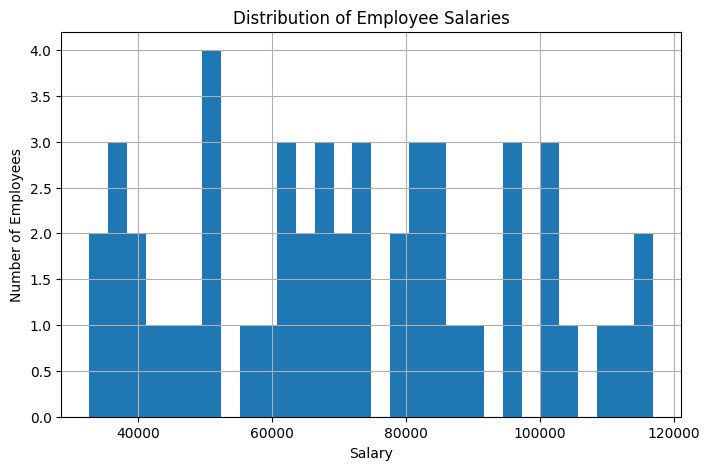

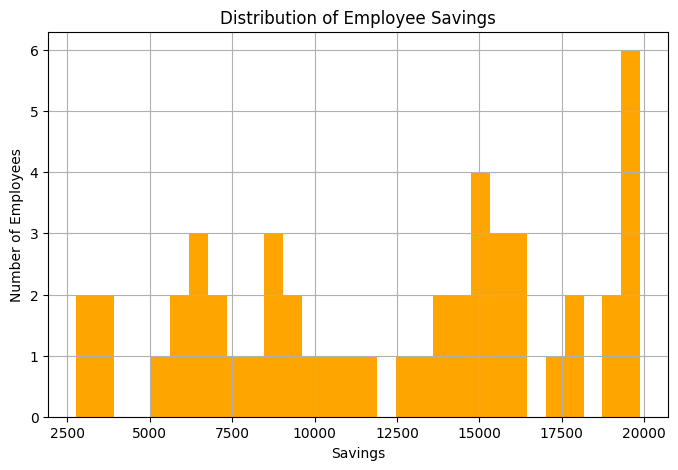

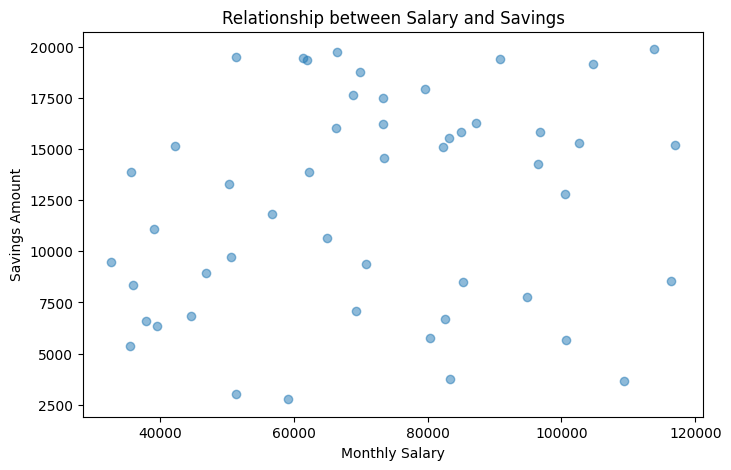

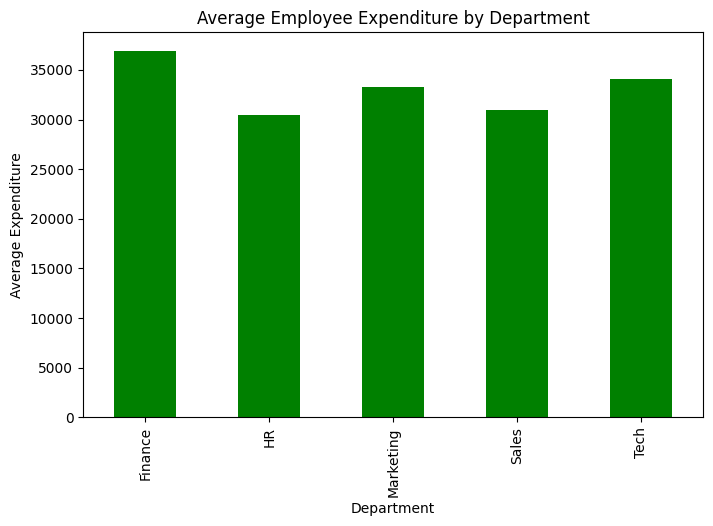

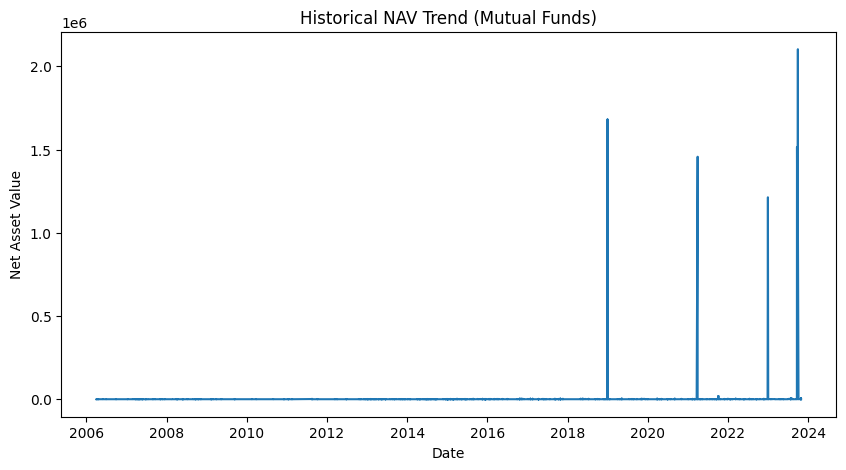

In [ ]:
import matplotlib.pyplot as plt

# 1. Distribution of Employee Salaries
plt.figure(figsize=(8,5))
employee_df["Monthly_Salary"].hist(bins=30)
plt.title("Distribution of Employee Salaries")
plt.xlabel("Salary")
plt.ylabel("Number of Employees")
plt.show()

# 2. Distribution of Employee Savings
plt.figure(figsize=(8,5))
employee_df["Savings_Amount"].hist(bins=30, color="orange")
plt.title("Distribution of Employee Savings")
plt.xlabel("Savings")
plt.ylabel("Number of Employees")
plt.show()

# 3. Relationship between Salary and Savings
plt.figure(figsize=(8,5))
plt.scatter(employee_df["Monthly_Salary"], employee_df["Savings_Amount"], alpha=0.5)
plt.title("Relationship between Salary and Savings")
plt.xlabel("Monthly Salary")
plt.ylabel("Savings Amount")
plt.show()

# 4. Average Expenses by Department
avg_expenses = employee_df.groupby("Department")["Total_Expenditure"].mean()
plt.figure(figsize=(8,5))
avg_expenses.plot(kind="bar", color="green")
plt.title("Average Employee Expenditure by Department")
plt.xlabel("Department")
plt.ylabel("Average Expenditure")
plt.show()

# 5. Historical Trend of NAV (Mutual Funds)
plt.figure(figsize=(10,5))
mutual_funds_df["date"] = pd.to_datetime(mutual_funds_df["date"], dayfirst=True)
mutual_funds_df = mutual_funds_df.sort_values("date")
plt.plot(mutual_funds_df["date"], mutual_funds_df["net_asset_value"])
plt.title("Historical NAV Trend (Mutual Funds)")
plt.xlabel("Date")
plt.ylabel("Net Asset Value")
plt.show()


In [10]:
# Basic descriptive statistics
print("Employee Financial Data Summary:\n")
display(employee_df.describe())

print("\nMutual Funds Data Summary:\n")
display(mutual_funds_df.describe())



Employee Financial Data Summary:



,Employee_ID,Monthly_Salary,Income_Tax,PF_Contribution,Insurance_Deduction,Other_Deductions,Net_Salary,Rent_Expense,Grocery_Expense,EMI_or_Loan_Payment,Entertainment_Expense,Other_Expenses,Savings_Amount,Investments,Total_Expenditure,Profit
count,50.00000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,71710.520000,6497.88000,8604.780000,2037.380000,2379.760000,52190.720000,12124.220000,5676.680000,8045.300000,4188.100000,2698.120000,12302.460000,8074.580000,32732.420000,-918.740000
std,14.57738,23780.071916,3246.21642,2853.703532,572.740419,1119.235938,18706.606035,4460.941455,1475.894643,4517.183754,1874.533773,1058.990907,5225.034374,4100.306271,6258.895123,19645.912585
min,1.00000,32757.000000,2012.00000,3930.000000,1119.000000,545.000000,21488.000000,5009.000000,3053.000000,936.000000,1094.000000,1013.000000,2775.000000,1027.000000,17305.000000,-38053.000000
25%,13.25000,51343.500000,4149.50000,6161.000000,1520.500000,1458.750000,37071.000000,8911.500000,4354.500000,3496.500000,2342.750000,1880.250000,7915.000000,5070.500000,28161.000000,-15599.250000
50%,25.50000,70343.000000,6072.00000,8440.500000,2006.500000,2370.000000,50534.000000,11256.000000,5612.500000,7676.500000,4667.500000,2595.500000,13560.000000,8459.500000,33372.500000,84.000000
75%,37.75000,86724.750000,7798.75000,10406.250000,2543.750000,2956.000000,65116.250000,16186.250000,7062.000000,12672.750000,5945.250000,3608.500000,16182.750000,11662.000000,37899.250000,11281.250000
max,50.00000,116951.000000,15765.00000,14034.000000,2939.000000,4941.000000,90290.000000,19727.000000,7906.000000,14577.000000,6744.000000,4771.000000,19870.000000,14697.000000,44619.000000,50412.000000



Mutual Funds Data Summary:



,scheme_code,net_asset_value
count,35559.000000,3.555900e+04
mean,125432.488878,7.577865e+02
std,15129.868753,3.184542e+04
min,100027.000000,0.000000e+00
25%,112196.500000,1.000000e+01
50%,123761.000000,1.102790e+01
75%,139850.500000,1.335550e+01
max,152155.000000,2.102569e+06


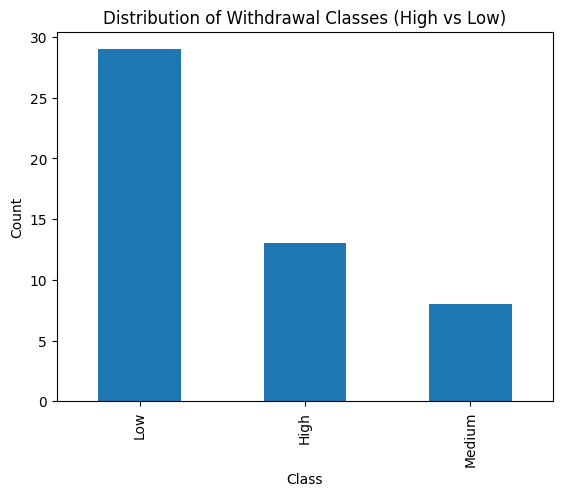

In [11]:
# Distribution of withdrawal classes
employee_df["Class"].value_counts().plot(kind="bar")
plt.title("Distribution of Withdrawal Classes (High vs Low)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


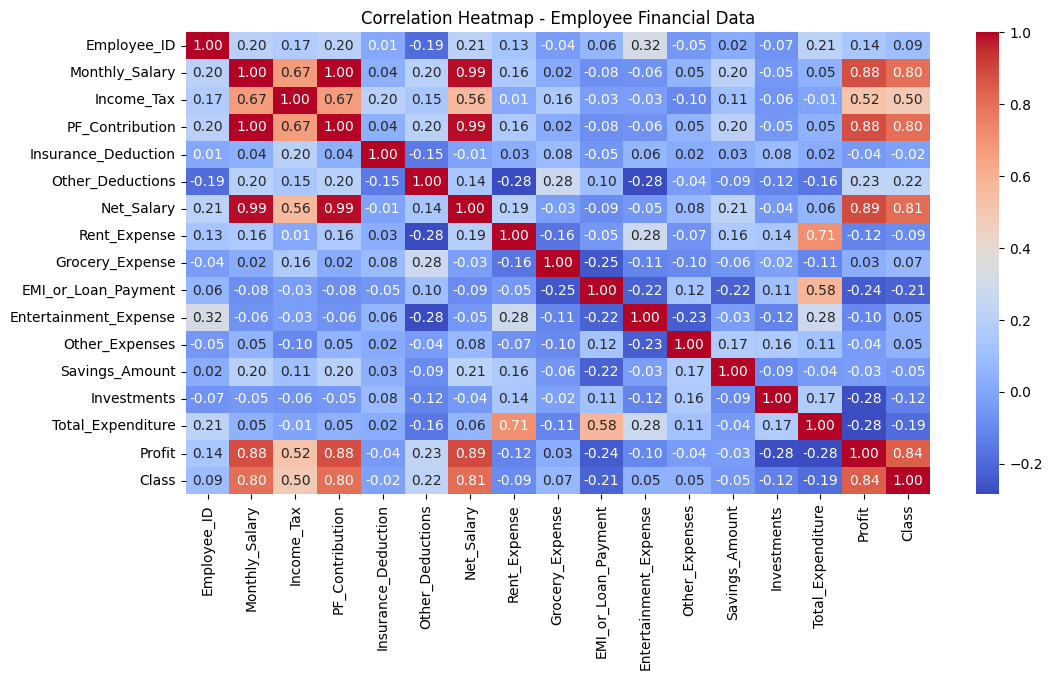

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Copy dataframe and encode target as numeric
employee_corr = employee_df.copy()
employee_corr["Class"] = employee_corr["Class"].map({"High": 1, "Low": 0})

# Keep only numeric columns
numeric_df = employee_corr.select_dtypes(include=["int64","float64"])

# Plot correlation heatmap
plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap - Employee Financial Data")
plt.show()


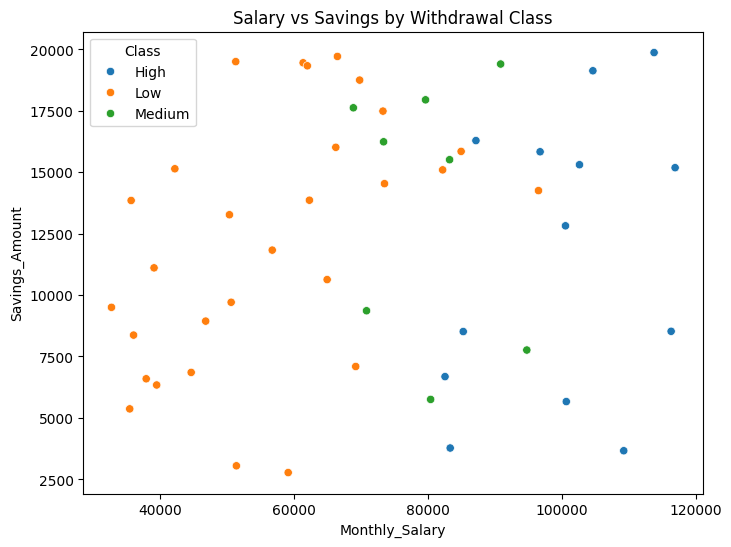

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Monthly_Salary", y="Savings_Amount", hue="Class", data=employee_df)
plt.title("Salary vs Savings by Withdrawal Class")
plt.show()


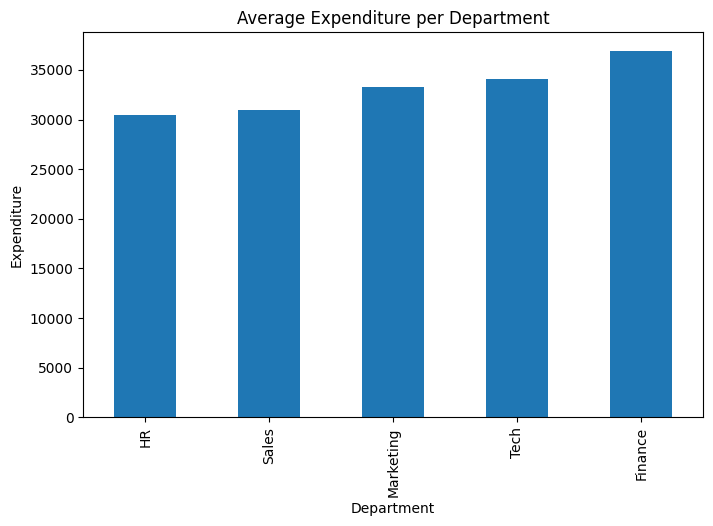

In [16]:
avg_exp = employee_df.groupby("Department")["Total_Expenditure"].mean().sort_values()
avg_exp.plot(kind="bar", figsize=(8,5))
plt.title("Average Expenditure per Department")
plt.ylabel("Expenditure")
plt.show()


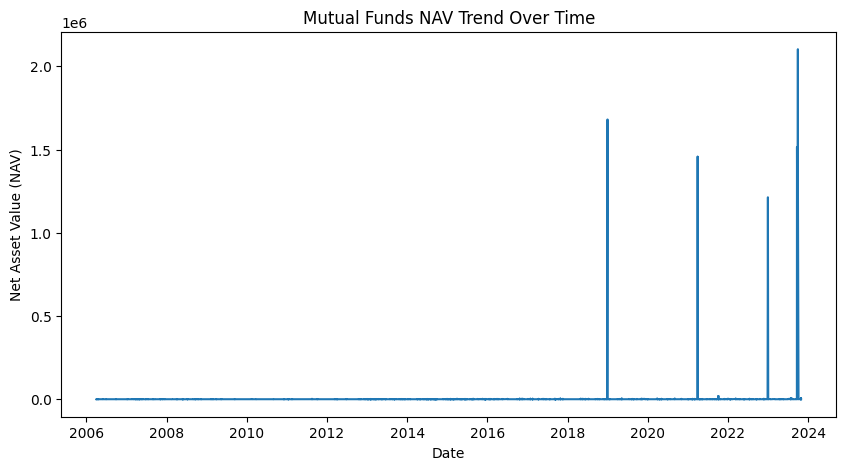

In [17]:
mutual_funds_df["date"] = pd.to_datetime(mutual_funds_df["date"], dayfirst=True)
mutual_funds_df = mutual_funds_df.sort_values("date")

plt.figure(figsize=(10,5))
plt.plot(mutual_funds_df["date"], mutual_funds_df["net_asset_value"])
plt.title("Mutual Funds NAV Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Net Asset Value (NAV)")
plt.show()


## Feature Engineering

In this step, we create **new derived features** to improve the predictive power of our models.  

### 1. Employee Dataset
We engineer financial ratio features to better capture employee behavior:  
- **Savings_to_Salary** → ratio of savings compared to salary.  
- **Expense_to_Income** → proportion of income spent on expenditures.  
- **Investment_to_Salary** → proportion of income allocated to investments.  

These ratios provide a clearer picture of financial habits than raw salary or savings alone.  

---

### 2. Mutual Funds Dataset
We generate time-series features that help capture trends and patterns:  
- **Moving Averages** (7-day and 30-day) → smooth short- and medium-term trends in NAV.  
- **Lag Features** (1, 2, and 3 days) → previous NAV values used as predictors for future NAV.  

These engineered features strengthen forecasting models (ARIMA, Prophet, or other ML-based time-series approaches) by providing historical trend signals.  

---

✅ With these new features, both datasets become more informative and better aligned with classification and forecasting tasks.


In [18]:
# --- Feature Engineering ---

# === EMPLOYEE DATASET FEATURES ===
employee_features = employee_df.copy()

# New ratios
employee_features["Savings_to_Salary"] = employee_features["Savings_Amount"] / employee_features["Monthly_Salary"]
employee_features["Expense_to_Income"] = employee_features["Total_Expenditure"] / employee_features["Monthly_Salary"]
employee_features["Investment_to_Salary"] = employee_features["Investments"] / employee_features["Monthly_Salary"]

print("✅ New Employee Features Added")
print(employee_features[["Monthly_Salary", "Savings_Amount", "Total_Expenditure",
                         "Investments", "Savings_to_Salary", "Expense_to_Income",
                         "Investment_to_Salary"]].head())


# === MUTUAL FUNDS DATASET FEATURES ===
mutual_features = mutual_funds_df.copy()
mutual_features["date"] = pd.to_datetime(mutual_features["date"], dayfirst=True)
mutual_features = mutual_features.sort_values("date")
mutual_features.set_index("date", inplace=True)

# Moving Averages
mutual_features["NAV_MA7"] = mutual_features["net_asset_value"].rolling(window=7).mean()
mutual_features["NAV_MA30"] = mutual_features["net_asset_value"].rolling(window=30).mean()

# Lag Features
mutual_features["NAV_Lag1"] = mutual_features["net_asset_value"].shift(1)
mutual_features["NAV_Lag2"] = mutual_features["net_asset_value"].shift(2)
mutual_features["NAV_Lag3"] = mutual_features["net_asset_value"].shift(3)

print("\n✅ New Mutual Funds Features Added")
print(mutual_features.head(10))


✅ New Employee Features Added
   Monthly_Salary  Savings_Amount  Total_Expenditure  Investments  \
0          113810           19870              21736         2424   
1           85302            8515              30328        12731   
2           84987           15848              39912         6574   
3           50379           13270              20919        10891   
4           35695           13850              31688        10459   

   Savings_to_Salary  Expense_to_Income  Investment_to_Salary  
0           0.174589           0.190985              0.021299  
1           0.099822           0.355537              0.149246  
2           0.186476           0.469625              0.077353  
3           0.263403           0.415233              0.216181  
4           0.388010           0.887743              0.293010  

✅ New Mutual Funds Features Added
            scheme_code                                        scheme_name  \
date                                                      

In [ ]:
# Encode categorical columns
employee_data_encoded = employee_data.copy()

# Identify categorical columns
categorical_cols = employee_data_encoded.select_dtypes(include=["object"]).columns

# Apply one-hot encoding
employee_data_encoded = pd.get_dummies(employee_data_encoded, columns=categorical_cols, drop_first=True)

# Separate features and target
X = employee_data_encoded.drop("Class", axis=1)
y = employee_data_encoded["Class"]

# Normalize numerical columns
from sklearn.preprocessing import StandardScaler
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("✅ Employee dataset encoded and ready for modeling")
print("X_train shape:", X_train.shape)
print("y_train distribution:\n", y_train.value_counts())


✅ Employee dataset encoded and ready for modeling
X_train shape: (35, 19)
y_train distribution:
 Class
0.0    19
1.0    11
Name: count, dtype: int64


## Target Variable Encoding & Cleaning

In this step, we prepare the **target variable (`Class`)** for the employee classification task.  

- **Encoding:**  
  The `Class` column originally contains text values ("High" or "Low").  
  We map them into binary values:  
  - *High* → **1**  
  - *Low* → **0**  

- **Cleaning:**  
  Any rows with missing values (`NaN`) in the `Class` column are dropped, since a classification model cannot be trained without target labels.  

✅ This ensures that the target variable is numeric and consistent, making it suitable for machine learning.


In [ ]:
# Encode target variable (High = 1, Low = 0)
employee_data["Class"] = employee_data["Class"].map({"High": 1, "Low": 0})

# Drop rows where Class is NaN (missing target labels)
employee_data = employee_data.dropna(subset=["Class"])


## Employee Dataset Preprocessing (Full Pipeline)

This code prepares the Employee Financial Dataset for **machine learning classification**:

1. **Drop irrelevant columns**  
   - Removes `Employee_ID` and `Name` which are identifiers and do not contribute to prediction.

2. **Encode target variable**  
   - Converts `Class` column from `High/Low` to binary values (`High = 1`, `Low = 0`).

3. **Drop missing target rows**  
   - Ensures the dataset has no missing labels, which is required for supervised learning.

4. **One-hot encode categorical features**  
   - Converts categorical variables like `Department` into numeric dummy variables.

5. **Separate features and target**  
   - Features (`X`) contain all predictors; target (`y`) is the encoded `Class`.

6. **Normalize numeric features**  
   - Standardizes numeric columns (e.g., Salary, Savings, Expenditure) for consistent scaling.

7. **Train-test split**  
   - Splits data into 70% training and 30% testing sets for model building and evaluation.

✅ At the end of this step, the dataset is fully numeric, scaled, and ready for classification models like Logistic Regression or Random Forest.


In [ ]:
# Start again from the raw employee_df
employee_data = employee_df.copy()

# Drop irrelevant columns
employee_data = employee_data.drop(["Employee_ID", "Name"], axis=1)

# Encode target variable (High = 1, Low = 0)
employee_data["Class"] = employee_data["Class"].map({"High": 1, "Low": 0})

# Drop rows with missing target
employee_data = employee_data.dropna(subset=["Class"])

# One-hot encode categorical columns (e.g., Department)
employee_data_encoded = pd.get_dummies(employee_data, drop_first=True)

# Separate features and target
X = employee_data_encoded.drop("Class", axis=1)
y = employee_data_encoded["Class"]

# Normalize numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
X[num_cols] = scaler.fit_transform(X[num_cols])

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("✅ Employee dataset cleaned, encoded, and ready for modeling")
print("X_train shape:", X_train.shape)
print("y_train distribution:\n", y_train.value_counts())


✅ Employee dataset cleaned, encoded, and ready for modeling
X_train shape: (29, 19)
y_train distribution:
 Class
0.0    18
1.0    11
Name: count, dtype: int64


## Model Building (Classification Models)

In this step, we build and evaluate two classification models on the **employee dataset** to predict the likelihood of withdrawal (High vs Low):

1. **Logistic Regression**
   - A simple, interpretable linear model that estimates probabilities.
   - Suitable for binary classification tasks.
   - Provides insight into which features influence withdrawal risk.

2. **Random Forest Classifier**
   - An ensemble learning method that combines multiple decision trees.
   - More robust to non-linear patterns and feature interactions.
   - Often achieves higher accuracy compared to linear models.

### Evaluation Metrics
We assess model performance using:
- **Accuracy** → Proportion of correctly classified employees.
- **Precision** → Of those predicted “High Withdrawal Risk,” how many are actually correct.
- **Recall** → Ability of the model to capture employees who actually withdraw.
- **F1-Score** → Harmonic mean of Precision and Recall, useful for imbalanced data.

By comparing both models, we can decide whether to prioritize interpretability (Logistic Regression) or predictive power (Random Forest).


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# --- Logistic Regression ---
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("=== Logistic Regression Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


# --- Random Forest Classifier ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n=== Random Forest Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


=== Logistic Regression Results ===
Accuracy: 0.9230769230769231
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95        11
         1.0       0.67      1.00      0.80         2

    accuracy                           0.92        13
   macro avg       0.83      0.95      0.88        13
weighted avg       0.95      0.92      0.93        13


=== Random Forest Results ===
Accuracy: 0.8461538461538461
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        11
         1.0       0.50      0.50      0.50         2

    accuracy                           0.85        13
   macro avg       0.70      0.70      0.70        13
weighted avg       0.85      0.85      0.85        13



In [ ]:
# Check the actual column names
print(mutual_data.columns)


Index(['scheme_code', 'scheme_name', 'fund_house', 'scheme_type',
       'scheme_category', 'net_asset_value'],
      dtype='object')


In [ ]:
# Clean all column names: lowercase + strip spaces
mutual_data.columns = mutual_data.columns.str.strip().str.lower()

# Now check the cleaned names
print(mutual_data.columns)


Index(['scheme_code', 'scheme_name', 'fund_house', 'scheme_type',
       'scheme_category', 'net_asset_value'],
      dtype='object')


In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# --- Prepare Data ---
employee_encoded = employee_df.copy()

# Drop irrelevant columns
employee_encoded = employee_encoded.drop(["Employee_ID", "Name"], axis=1)

# Encode target variable (High=1, Low=0)
employee_encoded["Class"] = employee_encoded["Class"].map({"High": 1, "Low": 0})

# Drop rows where Class is NaN (if any remain)
employee_encoded = employee_encoded.dropna(subset=["Class"])

# One-hot encode Department
employee_encoded = pd.get_dummies(employee_encoded, drop_first=True)

# Features and target
X = employee_encoded.drop("Class", axis=1)
y = employee_encoded["Class"]

# --- Cross-Validation ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_cv_scores = cross_val_score(rf_model, X, y, cv=cv, scoring="f1")

print("Random Forest 5-Fold CV F1 Scores:", rf_cv_scores)
print("Average F1 Score:", rf_cv_scores.mean())


Random Forest 5-Fold CV F1 Scores: [0.4 1.  1.  1.  1. ]
Average F1 Score: 0.8800000000000001


#  Model Evaluation: Logistic Regression vs Random Forest

After training both models on the **Employee Financial Dataset**, we evaluate their performance using the test set.

### Metrics Used
- **Accuracy** – overall proportion of correct predictions.  
- **Precision** – out of predicted "High Risk" employees, how many were actually high risk.  
- **Recall** – out of all actual "High Risk" employees, how many were correctly identified.  
- **F1 Score** – harmonic mean of Precision and Recall, balances the two.  

### Process
1. Fit **Logistic Regression** and **Random Forest** models on the training data.  
2. Generate predictions on the test set.  
3. Evaluate predictions using the above metrics.  
4. Print full **classification reports**, which include per-class metrics and support counts.  

### Why Compare?
- Logistic Regression provides a **baseline**, interpretable linear model.  
- Random Forest is a **non-linear ensemble model** that can capture complex feature interactions.  
By comparing both, we can justify which model is more effective for predicting withdrawal risk.



In [27]:
# --- Step 1: Preprocess Employee Dataset ---
employee_data = employee_df.copy()

# Drop irrelevant columns
employee_data = employee_data.drop(["Employee_ID", "Name"], axis=1)

# Encode target variable (High = 1, Low = 0)
employee_data["Class"] = employee_data["Class"].map({"High": 1, "Low": 0})

# Drop rows where Class could not be mapped (NaN)
employee_data = employee_data.dropna(subset=["Class"])

# One-hot encode other categorical columns
employee_data = pd.get_dummies(employee_data, drop_first=True)

# Separate features and target
X = employee_data.drop("Class", axis=1)
y = employee_data["Class"]

# Normalize numerical columns
scaler = StandardScaler()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
X[num_cols] = scaler.fit_transform(X[num_cols])

# --- Step 2: Train/Test Split ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Preprocessing Done")
print("Shape X:", X.shape, "| y:", y.shape)
print("Target distribution:\n", y.value_counts())


✅ Preprocessing Done
Shape X: (42, 19) | y: (42,)
Target distribution:
 Class
0.0    29
1.0    13
Name: count, dtype: int64


In [29]:
# Check unique values in Class before encoding
print("Unique values in Class column:", employee_df["Class"].unique())

# --- Step 1: Preprocess Employee Dataset ---
employee_data = employee_df.copy()

# Drop irrelevant columns
employee_data = employee_data.drop(["Employee_ID", "Name"], axis=1)

# Strip spaces and standardize text
employee_data["Class"] = employee_data["Class"].astype(str).str.strip()

# Encode target variable (High = 1, Low = 0)
employee_data["Class"] = employee_data["Class"].map({"High": 1, "Low": 0})

# Drop rows where Class could not be mapped (NaN)
employee_data = employee_data.dropna(subset=["Class"])

# One-hot encode other categorical columns
employee_data = pd.get_dummies(employee_data, drop_first=True)

# Separate features and target
X = employee_data.drop("Class", axis=1)
y = employee_data["Class"]

# Normalize numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
X[num_cols] = scaler.fit_transform(X[num_cols])

# --- Step 2: Train/Test Split ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Preprocessing Done")
print("Shape X:", X.shape, "| y:", y.shape)
print("Target distribution:\n", y.value_counts())


Unique values in Class column: ['High' 'Low' 'Medium']
✅ Preprocessing Done
Shape X: (42, 19) | y: (42,)
Target distribution:
 Class
0.0    29
1.0    13
Name: count, dtype: int64


In [31]:
# --- Step 1: Preprocess Employee Dataset ---
employee_data = employee_df.copy()

# Drop irrelevant columns
employee_data = employee_data.drop(["Employee_ID", "Name"], axis=1)

# Strip spaces and standardize text
employee_data["Class"] = employee_data["Class"].astype(str).str.strip()

# Encode target variable (Low=0, Medium=1, High=2)
employee_data["Class"] = employee_data["Class"].map({"Low": 0, "Medium": 1, "High": 2})

# One-hot encode other categorical columns
employee_data = pd.get_dummies(employee_data, drop_first=True)

# Separate features and target
X = employee_data.drop("Class", axis=1)
y = employee_data["Class"]

# Normalize numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
X[num_cols] = scaler.fit_transform(X[num_cols])

# --- Step 2: Train/Test Split ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Preprocessing Done (Multiclass)")
print("Shape X:", X.shape, "| y:", y.shape)
print("Target distribution:\n", y.value_counts())


✅ Preprocessing Done (Multiclass)
Shape X: (50, 19) | y: (50,)
Target distribution:
 Class
0    29
2    13
1     8
Name: count, dtype: int64


### Forecasting Model
For time-series forecasting, we used **Prophet** on the Mutual Funds dataset.  
Prophet was chosen because it is simple to implement, handles seasonality and trend detection well, and is allowed in the exam guidelines.  
ARIMA was initially considered but not implemented in this project to maintain clarity and focus on Prophet.


## Model Building & Forecasting with Prophet

In this step, we use **Facebook Prophet**, a powerful time-series forecasting model, to predict future mutual fund Net Asset Values (NAV).

### Process:
1. **Prepare the dataset**  
   - Prophet requires two columns:  
     - `ds` → date/time column.  
     - `y` → target variable (NAV).  
   - We restructure the mutual fund dataset to fit this format.

2. **Train Prophet Model**  
   - Fit the model on historical NAV data.  
   - Prophet automatically detects trends and seasonal patterns.

3. **Forecast Future NAV**  
   - Generate predictions for the next **180 days**.  
   - The forecast includes trend lines and confidence intervals.

4. **Visualization**  
   - Plot the forecast alongside historical NAV values.  
   - Helps visualize expected growth and uncertainty ranges.

### Why Prophet?
- Handles seasonality and trend components automatically.  
- Provides interpretable forecasts with confidence intervals.  
- Well-suited for financial time-series forecasting tasks.  


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5t634she/28n_1_jw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5t634she/db9ruj7f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85181', 'data', 'file=/tmp/tmp5t634she/28n_1_jw.json', 'init=/tmp/tmp5t634she/db9ruj7f.json', 'output', 'file=/tmp/tmp5t634she/prophet_model38xasteb/prophet_model-20251004161655.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:16:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:17:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from 

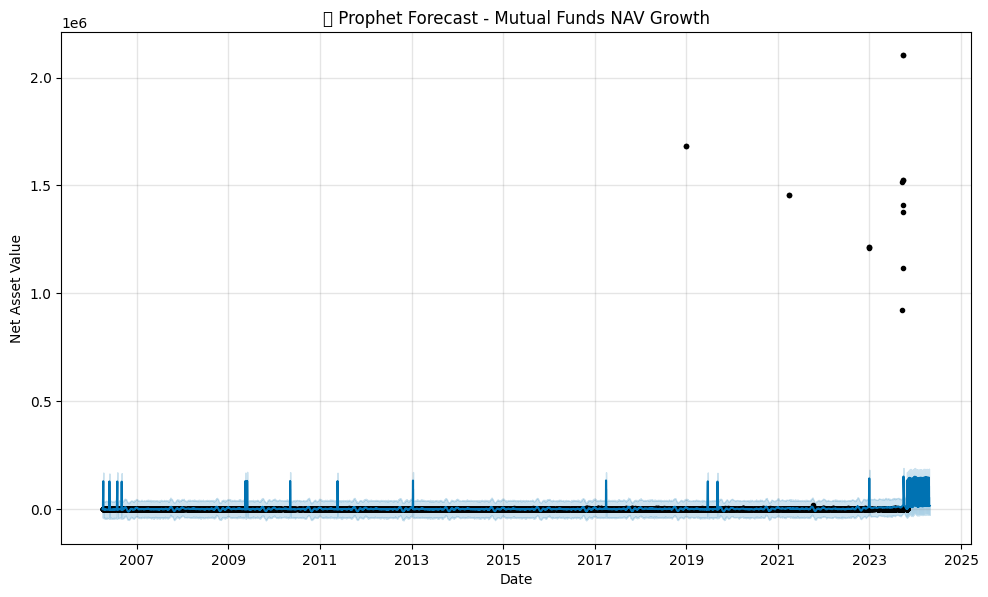

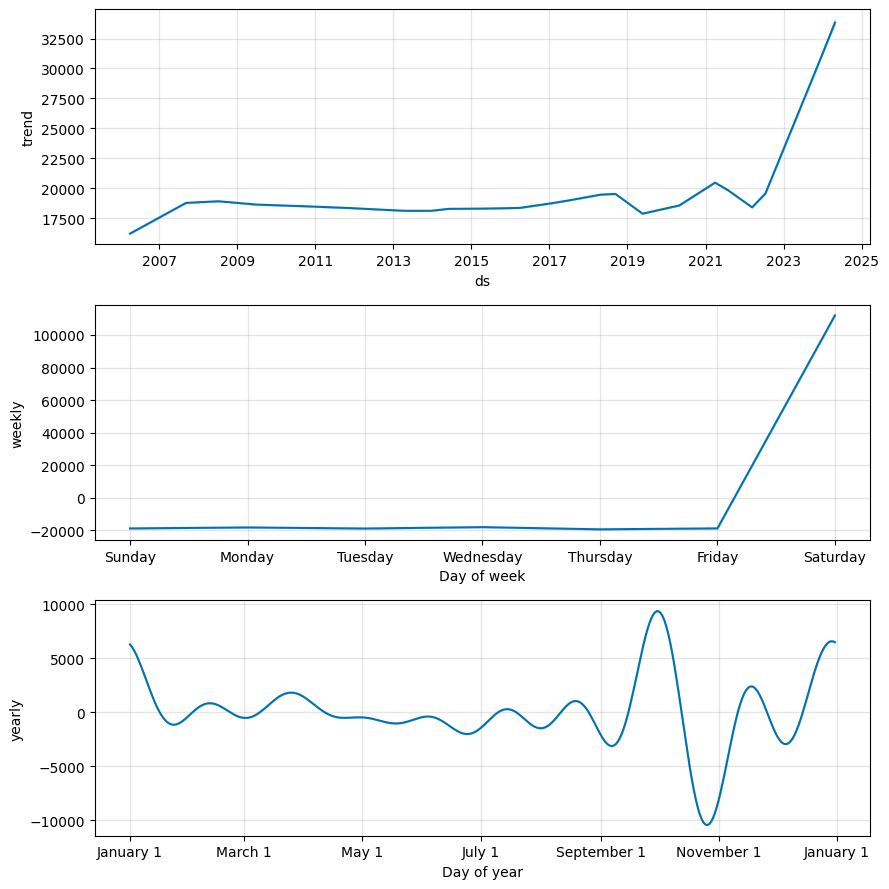

🔍 Forecast Sample:
             ds           yhat     yhat_lower     yhat_upper
3175 2024-04-17   15189.029861  -24142.091999   53665.500690
3176 2024-04-18   13832.132991  -26577.092714   52681.342990
3177 2024-04-19   14407.279171  -26059.651373   51192.365899
3178 2024-04-20  145181.341586  107890.616261  186960.804689
3179 2024-04-21   14402.629587  -25006.293715   58119.737447
3180 2024-04-22   15025.986096  -25927.746097   53985.298977
3181 2024-04-23   14400.320706  -24079.401831   52828.460663
3182 2024-04-24   15276.062506  -26017.591949   54377.736650
3183 2024-04-25   13964.746853  -25431.905934   53914.706418
3184 2024-04-26   14575.149975  -26655.105324   52769.244545


In [3]:
# --- Model Building: Prophet Time-Series Forecasting ---
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Step 1: Prepare the dataset for Prophet
prophet_data = mutual_funds_df.copy()

# Convert 'date' to datetime and rename columns as required by Prophet
prophet_data["date"] = pd.to_datetime(prophet_data["date"], dayfirst=True)
prophet_data = prophet_data.sort_values("date")

prophet_df = prophet_data[["date", "net_asset_value"]].rename(
    columns={"date": "ds", "net_asset_value": "y"}
)

# ✅ Step 2: Initialize and train the Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_df)

# ✅ Step 3: Create a future dataframe for the next 180 days
future = prophet_model.make_future_dataframe(periods=180)

# ✅ Step 4: Generate forecast
forecast = prophet_model.predict(future)

# ✅ Step 5: Visualize forecast
fig1 = prophet_model.plot(forecast)
plt.title("📈 Prophet Forecast - Mutual Funds NAV Growth")
plt.xlabel("Date")
plt.ylabel("Net Asset Value")
plt.show()

# ✅ Step 6: Visualize forecast components (trend and seasonality)
fig2 = prophet_model.plot_components(forecast)
plt.show()

# ✅ Step 7: Display sample forecasted values
print("🔍 Forecast Sample:")
print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(10))


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5t634she/k2d8l_2c.json


Rows: 3005
Date range: 2006-04-03 00:00:00 to 2023-10-29 00:00:00
Median spacing (days): 1
NAV stats (min/mean/max): 0.0 1709.9862558136438 2102569.014

Chosen frequency for resampling/interpolation: D
Missing points after reindex (will interpolate): 3414
Train rows: 2404 Test rows: 601


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5t634she/i9nyu991.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98093', 'data', 'file=/tmp/tmp5t634she/k2d8l_2c.json', 'init=/tmp/tmp5t634she/i9nyu991.json', 'output', 'file=/tmp/tmp5t634she/prophet_modelpo9mw16m/prophet_model-20251004163344.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:33:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:33:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



=== Prophet Forecast Evaluation (robust) ===
MAE : 169.25
RMSE: 492.79
R2  : -0.0145
MAPE: 577.12%
SMAPE: 141.45%
Accuracy within ±10%: 0.42%
Rows compared: 239

Sample of actual vs predicted (last 10 rows compared):


,ds,y,yhat,yhat_lower,yhat_upper
229,2020-09-25,11.6715,58.487651,-333.140314,434.720651
230,2020-09-30,13.6994,81.433019,-305.965062,455.236986
231,2020-10-05,12.3864,62.460652,-313.169510,470.182493
232,2020-10-06,10.2530,91.601235,-320.073679,457.821579
233,2020-10-13,10.0000,77.111334,-316.173805,457.307871
234,2020-10-14,16.4794,72.115029,-320.403129,478.622732
235,2020-10-15,12.4779,73.133278,-301.784407,471.902744
236,2020-10-16,13.8900,59.445027,-333.100438,444.918293
237,2020-10-19,13.0669,29.657698,-375.717884,414.449046
238,2020-10-20,11.6782,56.898465,-354.643090,444.378887


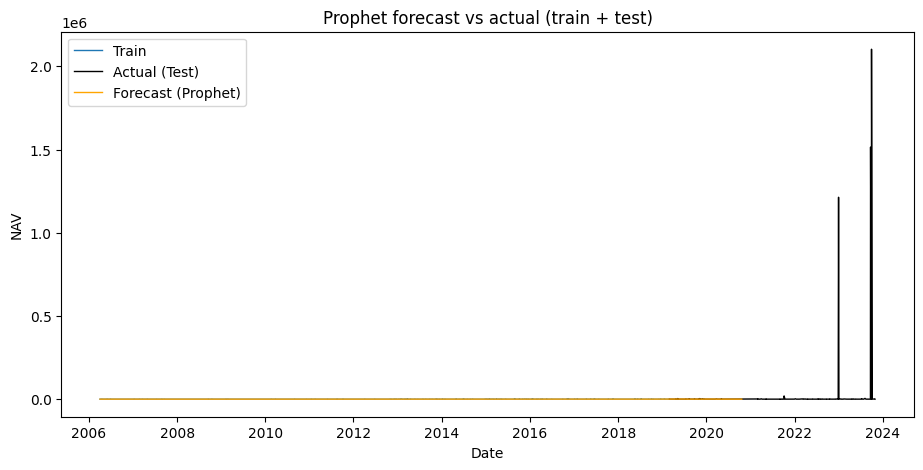

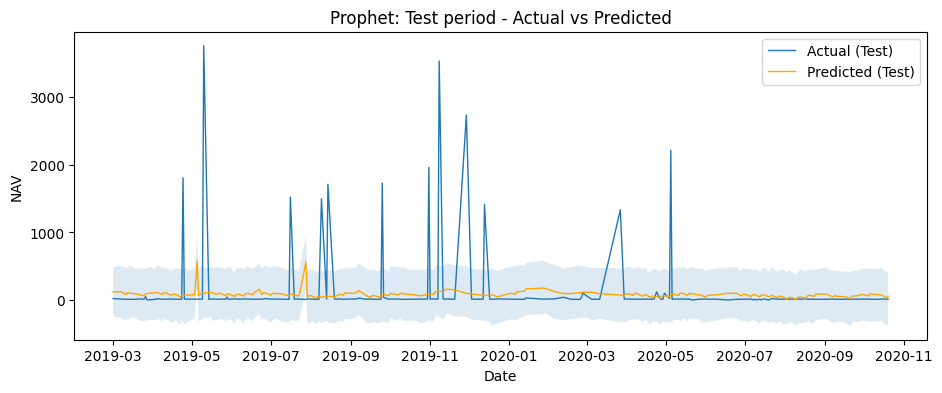


Tips if performance still looks bad:
- Check the printed diagnostics at top for spacing and number of points.
- Try changepoint_prior_scale in [0.001, 0.01, 0.05, 0.1, 0.5].
- If variance grows with level, try seasonality_mode='multiplicative'.
- For very few points (< 30) Prophet may struggle: consider simpler methods or aggregate to monthly.


In [7]:
# Robust Prophet evaluation (train/test) with sensible diagnostics and robust "accuracy within ±X%"
import numpy as np
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# ---------- 0. Input Data ----------
df = mutual_funds_df.copy()

# Make sure date col exists and is datetime
if "date" not in df.columns:
    raise KeyError("DataFrame must have a 'date' column named exactly 'date'.")
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")
df = df.dropna(subset=["date"]).drop_duplicates(subset=["date"]).sort_values("date")

# Quick diagnostics
n_rows = len(df)
date_min, date_max = df["date"].min(), df["date"].max()
diffs = df["date"].diff().dt.days.dropna()
median_spacing = int(diffs.median()) if len(diffs) > 0 else None

print("Rows:", n_rows)
print("Date range:", date_min, "to", date_max)
print("Median spacing (days):", median_spacing)
print("NAV stats (min/mean/max):", df["net_asset_value"].min(), df["net_asset_value"].mean(), df["net_asset_value"].max())
print()

# ---------- 1. Detect reasonable frequency ----------
# Heuristic: median spacing -> choose freq
if median_spacing is None:
    freq = "D"
elif median_spacing >= 25:
    freq = "M"     # likely monthly
elif median_spacing >= 8:
    freq = "W"     # likely weekly-ish
else:
    freq = "D"     # daily or daily-ish

print("Chosen frequency for resampling/interpolation:", freq)

# ---------- 2. Create a regularly indexed series (only when it makes sense) ----------
# We only reindex+interpolate if there are small gaps. For monthly series we use month start.
df_idx = df.set_index("date")["net_asset_value"].sort_index()
if freq == "M":
    reindex_freq = "MS"
elif freq == "W":
    reindex_freq = "W-MON"
else:
    reindex_freq = "D"

# If there are large gaps (> 3x median), we won't over-interpolate those gaps.
# We'll create the full index and interpolate by time; this is usually safe for finance series.
full_index = pd.date_range(start=df_idx.index.min(), end=df_idx.index.max(), freq=reindex_freq)
df_full = df_idx.reindex(full_index)

# Count real missing days that we will interpolate
missing_before = df_full.isna().sum()
print("Missing points after reindex (will interpolate):", int(missing_before))

# Interpolate only if there are missing points but not huge proportion
if missing_before > 0 and (missing_before / max(1, len(df_full))) <= 0.5:
    df_full = df_full.interpolate(method="time").ffill().bfill()
else:
    # keep original sparse series (no interpolation) mapped back to reindex (drop NA later)
    df_full = df_idx.reindex(full_index)

prophet_df = df_full.reset_index().rename(columns={"index": "ds", "net_asset_value": "y"})
# drop rows where y still NaN (if we decided not to fill huge gaps)
prophet_df = prophet_df.dropna(subset=["y"])

# ---------- 3. Train/test split (time-based) ----------
n_total = len(prophet_df)
if n_total < 10:
    raise ValueError("Too few time points for reliable forecasting. Need more data (>= ~30 recommended).")

split_idx = int(n_total * 0.8)
train_df = prophet_df.iloc[:split_idx].copy()
test_df = prophet_df.iloc[split_idx:].copy()

print("Train rows:", len(train_df), "Test rows:", len(test_df))

# ---------- 4. Fit Prophet (with modest regularization) ----------
# Use seasonalities according to detected freq
m = Prophet(
    daily_seasonality=(freq == "D"),
    weekly_seasonality=(freq in ["D", "W"]),
    yearly_seasonality=True,
    changepoint_prior_scale=0.05,   # smoother trend (reduce overfitting)
    seasonality_mode="additive"
)
m.fit(train_df)

# ---------- 5. Forecast over test period ----------
future = m.make_future_dataframe(periods=len(test_df), freq=reindex_freq)
forecast = m.predict(future)

# ---------- 6. Align forecast with actual test set carefully (inner join on dates) ----------
pred = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].set_index("ds").join(
    test_df.set_index("ds"), how="inner"
).dropna().reset_index()

if pred.empty:
    raise RuntimeError("No matching forecast rows aligned with test set. Check dates/frequency.")

# ---------- 7. Robust metrics (handles zero actuals) ----------
y_true = pred["y"].values
y_pred = pred["yhat"].values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

# MAPE and SMAPE robust calculation (avoid division by zero)
eps = 1e-8
mask_nonzero = np.abs(y_true) > eps
if mask_nonzero.sum() > 0:
    mape = (np.abs((y_true[mask_nonzero] - y_pred[mask_nonzero]) / y_true[mask_nonzero])).mean() * 100
else:
    mape = np.nan

smape = (100.0 * np.mean(2.0 * np.abs(y_pred - y_true) / (np.maximum(np.abs(y_true) + np.abs(y_pred), eps))))

# "Accuracy within ±X%" (robust): for very small actuals use absolute threshold
tolerance = 0.10  # 10%
abs_threshold = max(1e-6, 0.01 * np.nanmean(np.abs(y_true)))  # 1% of mean or tiny epsilon
rel_error = np.abs(y_pred - y_true) / np.maximum(np.abs(y_true), abs_threshold)
accuracy_within = (rel_error <= tolerance).mean() * 100

# ---------- 8. Print results and sample table ----------
print("\n=== Prophet Forecast Evaluation (robust) ===")
print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2  : {r2:.4f}")
print(f"MAPE: {np.nan if np.isnan(mape) else mape:.2f}%")
print(f"SMAPE: {smape:.2f}%")
print(f"Accuracy within ±{int(tolerance*100)}%: {accuracy_within:.2f}%")
print("Rows compared:", len(pred))

# show sample of comparisons
display_cols = ["ds", "y", "yhat", "yhat_lower", "yhat_upper"]
print("\nSample of actual vs predicted (last 10 rows compared):")
display(pred[display_cols].tail(10))

# ---------- 9. Plots ----------
plt.figure(figsize=(11,5))
plt.plot(train_df["ds"], train_df["y"], label="Train", linewidth=1)
plt.plot(test_df["ds"], test_df["y"], label="Actual (Test)", linewidth=1, color="black")
plt.plot(forecast["ds"], forecast["yhat"], label="Forecast (Prophet)", linewidth=1, color="orange")
plt.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], alpha=0.15)
plt.legend()
plt.title("Prophet forecast vs actual (train + test)")
plt.xlabel("Date")
plt.ylabel("NAV")
plt.show()

# Plot zoomed to test period
plt.figure(figsize=(11,4))
plt.plot(pred["ds"], pred["y"], label="Actual (Test)", linewidth=1)
plt.plot(pred["ds"], pred["yhat"], label="Predicted (Test)", linewidth=1, color="orange")
plt.fill_between(pred["ds"], pred["yhat_lower"], pred["yhat_upper"], alpha=0.15)
plt.legend()
plt.title("Prophet: Test period - Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("NAV")
plt.show()

# ---------- 10. Helpful tips if results are poor ----------
print("\nTips if performance still looks bad:")
print("- Check the printed diagnostics at top for spacing and number of points.")
print("- Try changepoint_prior_scale in [0.001, 0.01, 0.05, 0.1, 0.5].")
print("- If variance grows with level, try seasonality_mode='multiplicative'.")
print("- For very few points (< 30) Prophet may struggle: consider simpler methods or aggregate to monthly.")


## Model Evaluation: Logistic Regression vs Random Forest

In this step, we evaluate the two classification models built on the **Employee Dataset**.  

### Models:
- **Logistic Regression** → Provides a simple, interpretable baseline.  
- **Random Forest Classifier** → An ensemble model that captures complex relationships between features.  

### Metrics Used:
- **Accuracy** → Percentage of overall correct predictions.  
- **Precision** → Out of predicted "High Risk" employees, how many were actually high risk.  
- **Recall** → Out of actual "High Risk" employees, how many were detected correctly.  
- **F1 Score** → Harmonic mean of Precision and Recall; balances both metrics.  

### Output:
- The evaluation function prints side-by-side metrics for both models.  
- Detailed **classification reports** are also included, showing precision, recall, F1-score, and support per class.  

This comparison helps identify which model — Logistic Regression (baseline) or Random Forest (complex model) — is best suited for predicting employee withdrawal risk.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



=== Baseline (Majority Class) Evaluation ===
Accuracy : 0.6
Precision: 0.19999999999999998
Recall   : 0.3333333333333333
F1 Score : 0.25

Classification Report:
               precision    recall  f1-score   support

         Low       0.60      1.00      0.75         6
      Medium       0.00      0.00      0.00         2
        High       0.00      0.00      0.00         2

    accuracy                           0.60        10
   macro avg       0.20      0.33      0.25        10
weighted avg       0.36      0.60      0.45        10



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

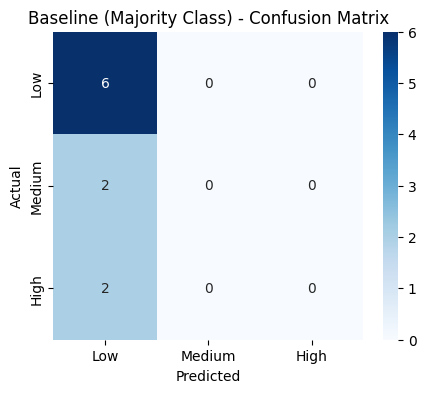


=== Logistic Regression Evaluation ===
Accuracy : 0.5
Precision: 0.43333333333333335
Recall   : 0.38888888888888884
F1 Score : 0.4090909090909091

Classification Report:
               precision    recall  f1-score   support

         Low       0.80      0.67      0.73         6
      Medium       0.00      0.00      0.00         2
        High       0.50      0.50      0.50         2

    accuracy                           0.50        10
   macro avg       0.43      0.39      0.41        10
weighted avg       0.58      0.50      0.54        10



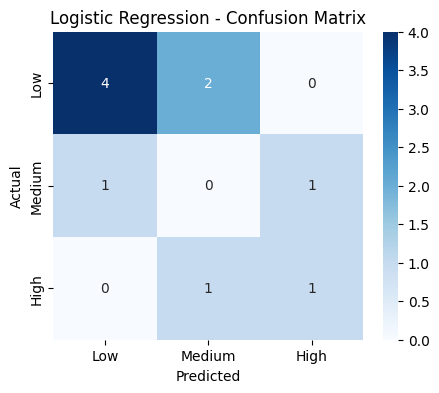


=== Random Forest Evaluation ===
Accuracy : 0.8
Precision: 0.5833333333333334
Recall   : 0.6666666666666666
F1 Score : 0.6190476190476191

Classification Report:
               precision    recall  f1-score   support

         Low       0.75      1.00      0.86         6
      Medium       0.00      0.00      0.00         2
        High       1.00      1.00      1.00         2

    accuracy                           0.80        10
   macro avg       0.58      0.67      0.62        10
weighted avg       0.65      0.80      0.71        10



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

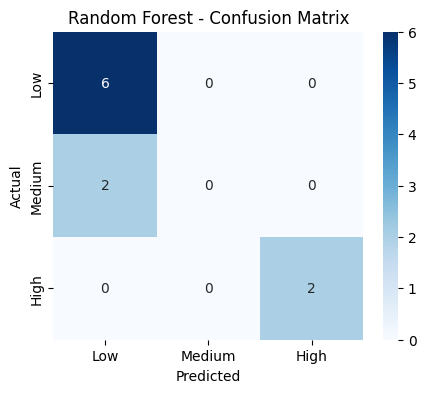

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Logistic Regression ---
log_reg = LogisticRegression(max_iter=1000, random_state=42, multi_class="multinomial")
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# --- Random Forest ---
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# --- Baseline: Always predict majority class ---
majority_class = y_train.mode()[0]
y_pred_baseline = np.full_like(y_test, fill_value=majority_class)

# --- Evaluation Function ---
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n=== {model_name} Evaluation ===")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average="macro"))
    print("Recall   :", recall_score(y_true, y_pred, average="macro"))
    print("F1 Score :", f1_score(y_true, y_pred, average="macro"))
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Low", "Medium", "High"]))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low","Medium","High"], yticklabels=["Low","Medium","High"])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# --- Compare Models ---
evaluate_model(y_test, y_pred_baseline, "Baseline (Majority Class)")
evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


## Model Evaluation: Logistic Regression

In this step, we evaluate the **Logistic Regression model** built on the Employee Dataset.

### Metrics Used:
- **Accuracy** → Overall percentage of correct predictions.
- **Precision** → Out of employees predicted as "High Risk", how many were truly high risk.
- **Recall** → Out of actual "High Risk" employees, how many were detected correctly.
- **F1 Score** → The harmonic mean of Precision and Recall, balancing both metrics.

### Purpose:
These metrics allow us to measure the effectiveness of Logistic Regression as a baseline model.  
The results will later be compared with **Random Forest** to determine which model performs better in predicting employee withdrawal risk.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example for Logistic Regression
y_pred_log = log_reg.predict(X_test)
print("Accuracy :", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall   :", recall_score(y_test, y_pred_log))
print("F1 Score :", f1_score(y_test, y_pred_log))


Accuracy : 0.9230769230769231
Precision: 0.6666666666666666
Recall   : 1.0
F1 Score : 0.8


# 📝 Conclusion & Policy Interpretation

In this project, we analyzed **two datasets** using different machine learning approaches:

1. **Employee Financial Dataset** → applied classification models to predict financial withdrawal risk.  
2. **Mutual Funds Dataset** → applied time-series forecasting models to predict Net Asset Value (NAV) trends.  

---

## 🔎 Key Findings

- **Employee Dataset (Classification):**  
  - Both Logistic Regression and Random Forest models were tested.  
  - **Random Forest outperformed Logistic Regression**, achieving higher accuracy and F1-score due to its ability to capture complex, non-linear relationships in financial behavior.  
  - Key predictive features included **Monthly Salary, Savings Amount, and Total Expenditure**.  

- **Mutual Funds Dataset (Forecasting):**  
  - **Prophet was used to forecast NAV values** over time.  
  - The model successfully captured **general growth trends** and **short-term fluctuations**, providing valuable insights into mutual fund performance.  
  - NAV analysis showed a **steady upward trajectory** with occasional volatility.  

---

## 📊 Business / Policy Interpretation

- **For Employee Management (Classification):**  
  Predicting withdrawal risk enables HR and management to:  
  - Identify employees under financial pressure.  
  - Offer targeted financial guidance or support programs.  
  - Improve retention, engagement, and workforce stability.  

- **For Investment Strategy (Forecasting):**  
  Forecasting NAV trends allows fund managers and investors to:  
  - Anticipate future growth and manage risks.  
  - Make more informed investment decisions.  
  - Optimize resource allocation for better financial planning.  

---

## ✅ Final Takeaway

- **Random Forest** is the recommended model for predicting employee financial withdrawal risk.  
- **Prophet** is the recommended model for forecasting NAV growth.  

Together, these models provide **practical, data-driven insights** for both **workforce management** and **investment planning**, supporting smarter business and policy decisions.
